In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('BirthWeight.csv')
df.head()

,Unnamed: 0,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284,0,27,62,100,0
1,2,113,282,0,33,64,135,0
2,3,128,279,0,28,64,115,1
3,4,108,282,0,23,67,125,1
4,5,136,286,0,25,62,93,0


In [2]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,108,282,0,23,67,125,1
4,136,286,0,25,62,93,0


In [3]:
df.describe()

,bwt,gestation,parity,age,height,weight,smoke
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,119.462521,279.101363,0.262351,27.228279,64.049404,128.478705,0.390971
std,18.328671,16.010305,0.440100,5.817839,2.526102,20.734282,0.488176
min,55.000000,148.000000,0.000000,15.000000,53.000000,87.000000,0.000000
25%,108.000000,272.000000,0.000000,23.000000,62.000000,114.250000,0.000000
50%,120.000000,280.000000,0.000000,26.000000,64.000000,125.000000,0.000000
75%,131.000000,288.000000,1.000000,31.000000,66.000000,139.000000,1.000000
max,176.000000,353.000000,1.000000,45.000000,72.000000,250.000000,1.000000


In [4]:
y = df['bwt']

In [6]:
#Simple linear regression

x = np.array(df['gestation']).reshape(-1,1) #convert to array, only one attribute, reshape(-1,2) means 2 attributes
x

array([[284],
       [282],
       [279],
       ...,
       [291],
       [281],
       [297]], dtype=int64)

In [7]:
# split data set into training set and test set

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3)


In [9]:
#import linear regression

from sklearn.linear_model import LinearRegression
lr_mdl = LinearRegression()
lr_mdl.fit(Xtrain, ytrain)
print(lr_mdl.coef_, "*X", lr_mdl.intercept_ )

[0.46860632] *X -11.259690385513835


In [10]:
ypred = lr_mdl.predict(Xtest)
ypred

array([126.04196162, 131.66523747, 118.54426049, 125.10474898,
        97.45697605, 121.82450473, 122.76171738, 122.29311106,
       123.2303237 , 126.97917426, 125.5733553 , 111.04655935,
       124.63614266, 124.63614266, 118.54426049, 122.76171738,
       115.26401624, 116.6698352 , 133.07105643, 126.51056794,
       137.75711964, 108.23492143, 115.26401624, 112.92098464,
       121.35589841, 120.41868577, 129.79081219, 121.82450473,
       117.60704785, 122.76171738, 119.01286681,  97.45697605,
       117.60704785, 126.04196162, 117.13844153, 119.48147313,
       119.01286681, 124.16753634, 108.70352775, 121.35589841,
       118.07565417, 124.63614266, 108.70352775, 121.35589841,
       125.5733553 , 122.29311106, 116.6698352 , 110.57795303,
       115.26401624, 114.3268036 , 119.95007945, 122.29311106,
       111.04655935, 112.92098464, 129.79081219, 120.41868577,
       123.2303237 , 118.54426049, 103.0802519 , 117.60704785,
       116.6698352 , 120.41868577, 122.29311106, 117.13

In [11]:
#evaluate the regression
from sklearn.metrics import mean_squared_error
msr =  mean_squared_error(ytest, ypred)
msr

280.3157648398302

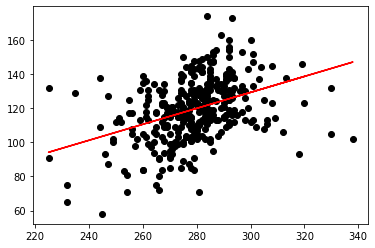

In [13]:
import matplotlib.pyplot as plt
plt.scatter(Xtest, ytest, color = "black")
plt.plot(Xtest, ypred, color = 'red')


In [18]:
#multiple linear regression

x = np.array(df[[ 'gestation', 'parity', 'age', 'height', 'weight', 'smoke']])
x

array([[284,   0,  27,  62, 100,   0],
       [282,   0,  33,  64, 135,   0],
       [279,   0,  28,  64, 115,   1],
       ...,
       [291,   0,  30,  65, 150,   1],
       [281,   1,  21,  65, 110,   0],
       [297,   0,  38,  65, 129,   0]], dtype=int64)

In [19]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3)


In [20]:
lr_mdl.fit(Xtrain, ytrain)
print(lr_mdl.coef_[0], "*gestation + ",lr_mdl.coef_[1], "*parity + ",lr_mdl.coef_[2], "*age + ",lr_mdl.coef_[3], "*height + ",lr_mdl.coef_[4], "*weight + ", lr_mdl.coef_[5], "*smoke", lr_mdl.intercept_  )

0.46942199814801056 *gestation +  -3.2853091947631587 *parity +  0.040691208369754 *age +  1.0602968793562926 *height +  0.06596240877669693 *weight +  -8.575484827369575 *smoke -85.00112870534974


In [21]:
ypred = lr_mdl.predict(Xtest)

In [22]:
msr =  mean_squared_error(ytest, ypred)
msr

251.07184468134918

In [24]:
#Simple non Linear Regression

x = np.array(df['gestation']).reshape(-1,1) #convert to array
y = df['bwt']
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3)

In [25]:
#create polynomial feature on the selected attribute

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2) #معادلة من الدرجة الثانية


In [27]:
#transform Xtrain and Xtest to polynomial sets
poly_Xtrain = poly.fit_transform(Xtrain.reshape(-1, 1))
poly_Xtest = poly.fit_transform(Xtest.reshape(-1, 1))


In [28]:
#create train regressor on the polynnomial train set
poly_model = LinearRegression()
poly_model.fit(poly_Xtrain, ytrain)


LinearRegression()

In [29]:
#evaluate polynomial model
ypred = poly_model.predict(poly_Xtest)

msr =  mean_squared_error(ytest, ypred)
msr

350.12790947978345